In [ ]:
import pandas as pd

# dataset load karo
df = pd.read_csv("../data/data_center_outage_dataset.csv")

# dataset ki first 5 rows dekho
print("First 5 rows:")
display(df.head())

# dataset ka size (rows, columns)
print("\nShape of dataset:", df.shape)

# columns ke naam
print("\nColumns in dataset:", df.columns.tolist())

# missing values check
print("\nMissing values per column:")
print(df.isnull().sum())


First 5 rows:


,Timestamp,Server_ID,CPU_Utilization(%),Memory_Usage(%),Disk_IO_Rate(MB/s),Network_Traffic(MBps),Temperature(°C),Power_Consumption(kWh),Cooling_Efficiency(%),Error_Logs_Count,Past_Outage(Yes/No)
0,2023-01-01 00:00:00,Server_39,55.825749,34.543558,103.784906,188.429913,31.523626,430.658014,86.065503,1,No
1,2023-01-01 00:01:00,Server_29,75.743178,75.625001,123.774900,93.940843,33.235469,518.493577,79.003460,1,No
2,2023-01-01 00:02:00,Server_15,61.688770,33.055851,171.068162,262.640567,27.245036,453.065888,81.256339,0,Yes
3,2023-01-01 00:03:00,Server_43,84.561438,54.890939,165.560655,407.283246,33.712382,484.366871,69.461407,3,No
4,2023-01-01 00:04:00,Server_8,35.128210,56.635398,92.495335,392.872361,27.800369,422.866906,63.552593,2,No



Shape of dataset: (10000, 11)

Columns in dataset: ['Timestamp', 'Server_ID', 'CPU_Utilization(%)', 'Memory_Usage(%)', 'Disk_IO_Rate(MB/s)', 'Network_Traffic(MBps)', 'Temperature(°C)', 'Power_Consumption(kWh)', 'Cooling_Efficiency(%)', 'Error_Logs_Count', 'Past_Outage(Yes/No)']

Missing values per column:
Timestamp                 0
Server_ID                 0
CPU_Utilization(%)        0
Memory_Usage(%)           0
Disk_IO_Rate(MB/s)        0
Network_Traffic(MBps)     0
Temperature(°C)           0
Power_Consumption(kWh)    0
Cooling_Efficiency(%)     0
Error_Logs_Count          0
Past_Outage(Yes/No)       0
dtype: int64


In [ ]:
# Basic statistics of dataset
df.describe(include='all')


,Timestamp,Server_ID,CPU_Utilization(%),Memory_Usage(%),Disk_IO_Rate(MB/s),Network_Traffic(MBps),Temperature(°C),Power_Consumption(kWh),Cooling_Efficiency(%),Error_Logs_Count,Past_Outage(Yes/No)
count,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,10000,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2023-01-01 00:00:00,Server_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,1,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8971
mean,NaN,NaN,54.930958,59.958131,119.937502,301.293794,27.028819,451.117116,74.939048,1.979000,NaN
std,NaN,NaN,19.771019,14.841190,49.904174,117.557345,4.986034,100.392423,9.837468,1.386345,NaN
min,NaN,NaN,0.000000,2.154370,0.007564,0.771189,15.000000,200.000000,40.000000,0.000000,NaN
25%,NaN,NaN,41.568713,49.800846,84.956368,219.567214,23.656364,382.422148,68.260574,1.000000,NaN
50%,NaN,NaN,54.920147,60.059726,119.405523,301.664622,27.052280,451.498944,74.961699,2.000000,NaN
75%,NaN,NaN,68.515485,70.115656,154.294076,382.038260,30.387018,519.690770,81.607027,3.000000,NaN


In [ ]:
print(df.columns.tolist())


['Timestamp', 'Server_ID', 'CPU_Utilization(%)', 'Memory_Usage(%)', 'Disk_IO_Rate(MB/s)', 'Network_Traffic(MBps)', 'Temperature(°C)', 'Power_Consumption(kWh)', 'Cooling_Efficiency(%)', 'Error_Logs_Count', 'Past_Outage(Yes/No)']


In [ ]:
# Rename outage column for simplicity
df.rename(columns={"Past Outage (Yes/No)": "Past_Outage"}, inplace=True)


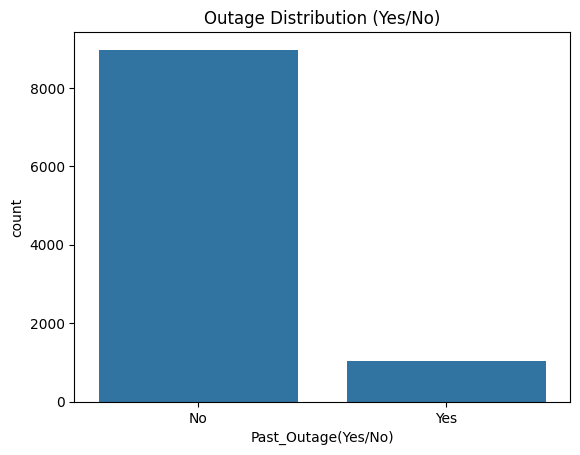

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outage distribution
sns.countplot(x="Past_Outage(Yes/No)", data=df)
plt.title("Outage Distribution (Yes/No)")
plt.show()


In [ ]:
print(df.columns.tolist())

['Timestamp', 'Server_ID', 'CPU_Utilization(%)', 'Memory_Usage(%)', 'Disk_IO_Rate(MB/s)', 'Network_Traffic(MBps)', 'Temperature(°C)', 'Power_Consumption(kWh)', 'Cooling_Efficiency(%)', 'Error_Logs_Count', 'Past_Outage(Yes/No)']


In [ ]:
df.rename(columns={
    "CPU_Utilization(%)": "CPU_Utilization",
    "Memory_Usage(%)": "Memory_Usage",
    "Disk_I/O_Rate": "Disk_IO",
    "Network_Traffic (MBps)": "Network_Traffic",
    "Temperature(°C)": "Temperature",
    "Power_Consumption(kWh)": "Power_Consumption",
    "Cooling_Efficiency(%)": "Cooling_Efficiency",
    "Error_Logs_Count": "Error_Logs",
    "Past_Outage(Yes/No)": "Past_Outage"
}, inplace=True)

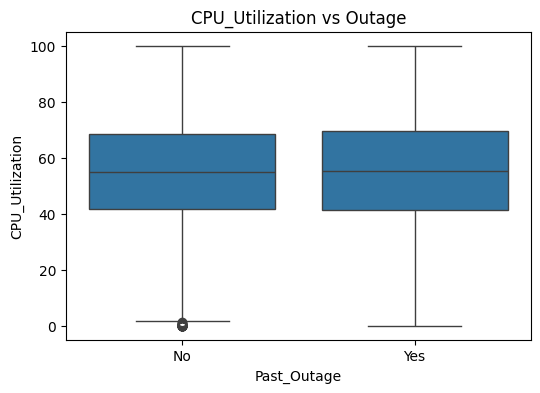

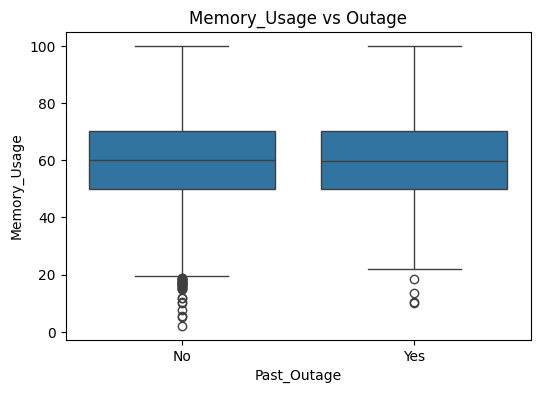

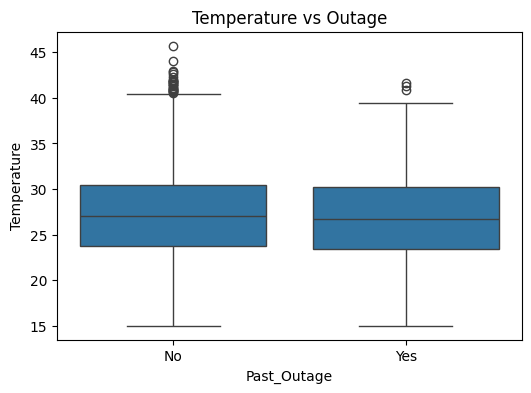

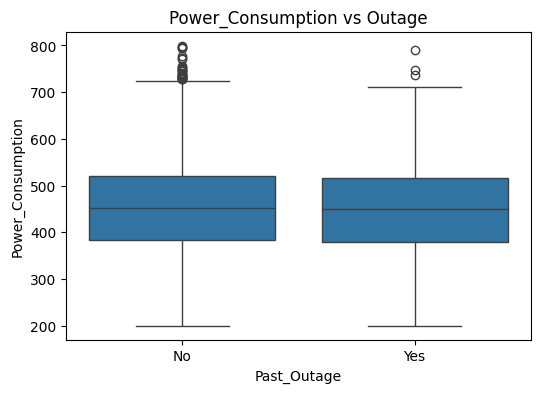

In [ ]:
features = ["CPU_Utilization", "Memory_Usage", "Temperature", "Power_Consumption"]

for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Past_Outage", y=col, data=df)
    plt.title(f"{col} vs Outage")
    plt.show()


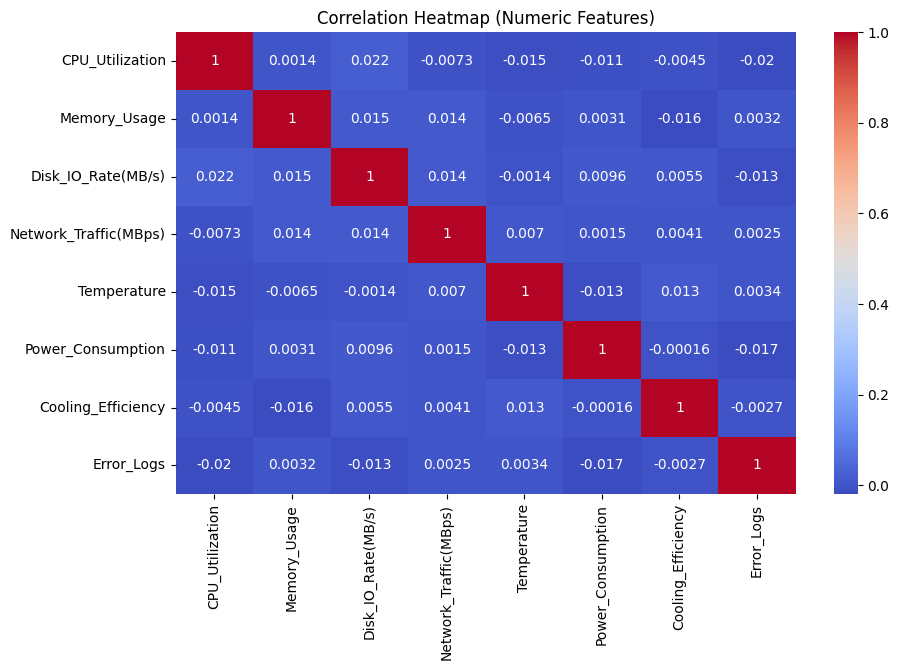

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()



In [ ]:
df["Past_Outage"] = df["Past_Outage"].map({"No": 0, "Yes": 1})


In [ ]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day
df["Month"] = df["Timestamp"].dt.month
df["Weekday"] = df["Timestamp"].dt.weekday


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Server_ID"] = le.fit_transform(df["Server_ID"])


In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [ ]:
X = df.drop(columns=["Timestamp", "Past_Outage"])  # features
y = df["Past_Outage"]  # target


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1794
           1       0.00      0.00      0.00       206

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.80      0.90      0.85      2000

Confusion Matrix:
 [[1794    0]
 [ 206    0]]


C:\Users\lalit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lalit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lalit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1794
           1       0.00      0.00      0.00       206

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.80      0.90      0.85      2000

Confusion Matrix:
 [[1794    0]
 [ 206    0]]


C:\Users\lalit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lalit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lalit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

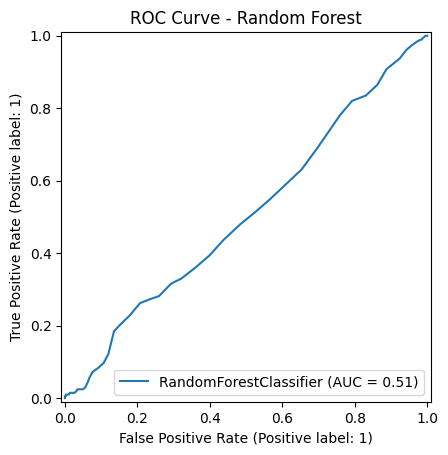

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()


In [ ]:
import os
import joblib

# Create folder if not exists
os.makedirs("models", exist_ok=True)

# Save model
joblib.dump(rf, "models/rf_model.joblib")
print("✅ Random Forest model saved successfully!")


FileNotFoundError: [Errno 2] No such file or directory: 'models/rf_model.joblib'

In [ ]:
joblib.dump(rf, "models/rf_model.joblib")


FileNotFoundError: [Errno 2] No such file or directory: 'models/rf_model.joblib'

In [ ]:
import os
print(os.getcwd())


E:\DataCenterOutage\notebooks


In [ ]:
import os

# go to project root
os.chdir(r"E:\DataCenterOutage")

# ensure models folder exists
os.makedirs("models", exist_ok=True)


In [ ]:
import joblib
joblib.dump(rf, "models/rf_model.joblib")
print("✅ Model saved successfully at E:/DataCenterOutage/models/rf_model.joblib")


✅ Model saved successfully at E:/DataCenterOutage/models/rf_model.joblib


In [ ]:
import joblib

# Model load
rf_loaded = joblib.load("models/rf_model.joblib")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict
y_pred = rf_loaded.predict(X_test)

# Metrics
print("🔍 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

print("\n📊 Detailed Report:\n", classification_report(y_test, y_pred))


🔍 Model Evaluation:
Accuracy: 0.897
Precision: 0.804609
Recall: 0.897
F1 Score: 0.8482962572482868

📊 Detailed Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1794
           1       0.00      0.00      0.00       206

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.80      0.90      0.85      2000



C:\Users\lalit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lalit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lalit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [ ]:
import streamlit as st
import joblib
import pandas as pd

st.title("💻 Data Center Outage Prediction")

# Load saved Random Forest model
rf_model = joblib.load("models/rf_model.joblib")

st.header("Enter Server & Environment Details:")

# User Inputs
server_id = st.number_input("Server ID", min_value=0, max_value=100, value=1)
cpu = st.slider("CPU Utilization (%)", 0, 100, 50)
memory = st.slider("Memory Usage (%)", 0, 200, 100)
disk_io = st.slider("Disk I/O Rate", 0, 100, 10)
network = st.slider("Network Traffic (MBps)", 0, 500, 50)
temperature = st.slider("Temperature (°C)", 0, 100, 35)
power = st.slider("Power Consumption (kWh)", 0, 500, 200)
cooling = st.slider("Cooli")


2025-09-19 23:26:22.211 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:26:22.978 
  command:

    streamlit run C:\Users\lalit\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-19 23:26:22.979 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:26:22.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:26:23.167 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:26:23.169 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:26:23.170 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:26:

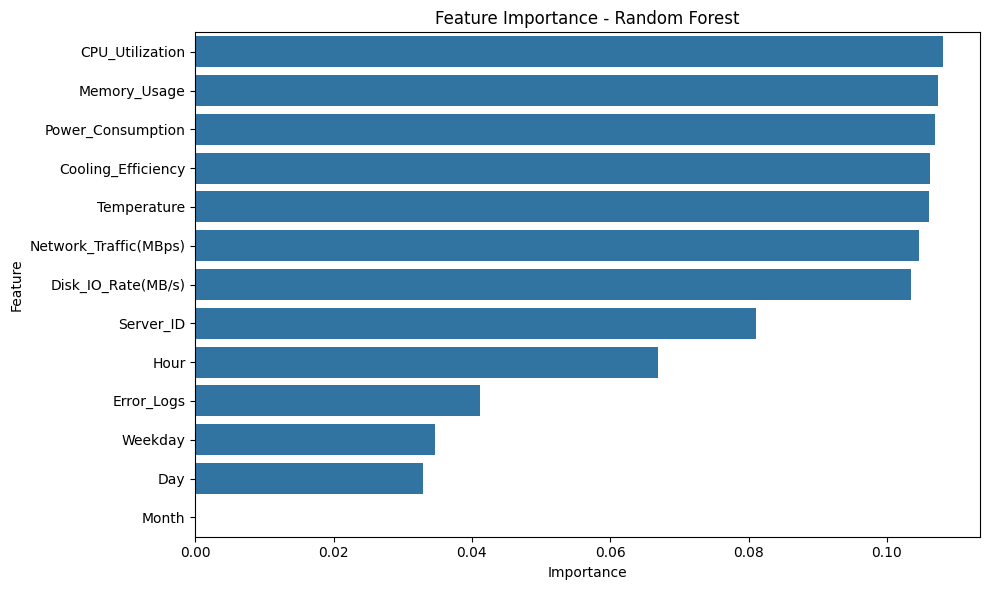

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd

# Load model and data
rf_model = joblib.load("models/rf_model.joblib")

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns
feat_imp = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.savefig("reports/figures/feature_importance.png")
plt.show()


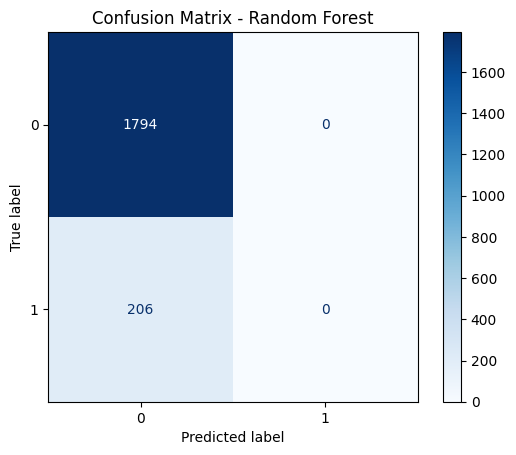

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.savefig("reports/figures/confusion_matrix.png")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({"Feature": X_train.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

st.subheader("Feature Importance")
st.bar_chart(feat_imp.set_index("Feature"))


2025-09-19 23:28:01.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:01.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:01.087 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:03.702 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:03.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:03.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
st.subheader("Past Outage Trend")
import matplotlib.pyplot as plt

df['Past_Outage'] = df['Past_Outage'].map({0: "No", 1: "Yes"})
outage_trend = df.groupby('Month')['Past_Outage'].value_counts().unstack().fillna(0)

st.line_chart(outage_trend)


2025-09-19 23:28:16.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:16.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:16.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:16.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:16.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:16.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
if st.button("Save Prediction"):
    input_data['Predicted_Outage'] = prediction
    input_data.to_csv("reports/prediction.csv", index=False)
    st.success("✅ Prediction saved as prediction.csv")


2025-09-19 23:28:32.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:32.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:32.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:32.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:32.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:28:32.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
error_logs = st.number_input("Error_Logs_Count", min_value=0, max_value=100, value=0)


2025-09-19 23:33:43.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:33:43.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:33:43.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:33:43.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:33:43.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:33:43.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:33:43.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load model
rf_model = joblib.load("models/rf_model.joblib")

st.title("💻 Data Center Outage Prediction")

# 1️⃣ User Inputs
server_id = st.number_input("Server ID", min_value=0, max_value=100, value=1)
cpu = st.slider("CPU Utilization (%)", 0, 100, 50)
memory = st.slider("Memory Usage (%)", 0, 200, 100)
disk_io = st.slider("Disk I/O Rate", 0, 100, 10)
network = st.slider("Network Traffic (MBps)", 0, 500, 50)
temperature = st.slider("Temperature (°C)", 0, 100, 35)
power = st.slider("Power Consumption (kWh)", 0, 500, 200)
cooling = st.slider("Cooling Efficiency (%)", 0, 100, 90)
error_logs = st.number_input("Error Logs Count", min_value=0, max_value=100, value=0)
hour = st.slider("Hour of Day", 0, 23, 12)
day = st.slider("Day of Month", 1, 31, 5)
month = st.slider("Month", 1, 12, 8)
weekday = st.slider("Weekday (0=Mon)", 0, 6, 2)


2025-09-19 23:35:07.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:35:07.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:35:07.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:35:07.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:35:07.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:35:07.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:35:07.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:35:07.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# Corrected input_data
input_data = pd.DataFrame([{
    "Server_ID": server_id,
    "CPU_Utilization": cpu,
    "Memory_Usage": memory,
    "Disk_IO": disk_io,
    "Network_Traffic": network,
    "Temperature": temperature,
    "Power_Consumption": power,
    "Cooling_Efficiency": cooling,
    "Error_Logs": error_logs,   # <-- correct variable name
    "Hour": hour,
    "Day": day,
    "Month": month,
    "Weekday": weekday
}])


In [ ]:
if st.button("Predict Outage"):
    prediction = rf_model.predict(input_data)[0]
    pred_prob = rf_model.predict_proba(input_data)[0][1]
    st.write(f"⚡ Risk Score: {pred_prob*100:.2f}%")
    
    if pred_prob > 0.7:
        st.error("⚠️ High Risk of Outage")
    elif pred_prob > 0.3:
        st.warning("⚠️ Medium Risk of Outage")
    else:
        st.success("✅ Low Risk of Outage")


2025-09-19 23:36:21.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:36:21.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:36:21.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:36:21.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:36:21.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:36:21.726 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({"Feature": input_data.columns, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

st.subheader("📊 Feature Importance")
st.bar_chart(feat_imp.set_index("Feature"))


2025-09-19 23:36:50.916 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:36:50.917 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:36:50.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:36:50.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:36:50.939 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:36:50.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
st.subheader("📈 Past Outage Trend")
df['Past_Outage'] = df['Past_Outage'].map({0: "No", 1: "Yes"})
outage_trend = df.groupby('Month')['Past_Outage'].value_counts().unstack().fillna(0)
st.line_chart(outage_trend)


2025-09-19 23:37:04.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:04.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:04.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:04.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:04.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:04.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
if st.button("Save Prediction"):
    input_data['Predicted_Outage'] = prediction
    input_data.to_csv("reports/prediction.csv", index=False)
    st.success("✅ Prediction saved as prediction.csv")

# Download button
csv = input_data.to_csv(index=False)
st.download_button(
    label="Download Prediction CSV",
    data=csv,
    file_name='prediction.csv',
    mime='text/csv'
)


2025-09-19 23:37:21.120 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:21.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:21.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:21.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:21.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:21.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:21.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:37:21.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

False

In [ ]:
if st.button("Predict Outage"):
    # Prediction
    prediction = rf_model.predict(input_data)[0]

    # Probability
    pred_prob = rf_model.predict_proba(input_data)[0][1]
    st.write(f"⚡ Risk Score: {pred_prob*100:.2f}%")

    # Conditional risk messages
    if pred_prob > 0.7:
        st.error("⚠️ High Risk of Outage")
    elif pred_prob > 0.3:
        st.warning("⚠️ Medium Risk of Outage")
    else:
        st.success("✅ Low Risk of Outage")


2025-09-19 23:38:23.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:38:23.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:38:23.626 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:38:23.626 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:38:23.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:38:23.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": input_data.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

st.subheader("📊 Feature Importance")
st.bar_chart(feat_imp.set_index("Feature"))


2025-09-19 23:38:49.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:38:49.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:38:49.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:38:49.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:38:49.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:38:49.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
st.subheader("📈 Past Outage Trend")
df['Past_Outage'] = df['Past_Outage'].map({0: "No", 1: "Yes"})
outage_trend = df.groupby('Month')['Past_Outage'].value_counts().unstack().fillna(0)
st.line_chart(outage_trend)


2025-09-19 23:39:05.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:05.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:05.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:05.610 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:05.611 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:05.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
# Save prediction
if st.button("Save Prediction"):
    input_data['Predicted_Outage'] = prediction
    input_data.to_csv("reports/prediction.csv", index=False)
    st.success("✅ Prediction saved as prediction.csv")

# Download button
csv = input_data.to_csv(index=False)
st.download_button(
    label="Download Prediction CSV",
    data=csv,
    file_name='prediction.csv',
    mime='text/csv'
)


2025-09-19 23:39:19.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:19.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:19.963 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:19.964 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:19.965 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:19.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:19.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 23:39:19.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

False